<a href="https://colab.research.google.com/github/tklwin/Deep-Learning/blob/main/transfer_learning_dog_vs_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install kaggle library
!pip install kaggle

In [ ]:
# Import kaggle json for api
import os
import json
from zipfile import ZipFile
from google.colab import drive

drive.mount('/content/drive')

kaggle_credentials = json.load(open("/content/drive/MyDrive/Colab Notebooks/kaggle.json"))

# Setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]

# Download dataset
!kaggle competitions download -c dogs-vs-cats

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

dogs-vs-cats.zip  drive  sample_data


In [ ]:
# Extracting the compressed dataset

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted successfully')

the dataset is extracted successfully


In [ ]:
# Extracting the compressed train dataset

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted successfully')

the dataset is extracted successfully


In [ ]:
import os
# count total files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print(f'total images file in train foler: {file_count}')

total images file in train foler: 25000


## Printing the name of images

In [ ]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.4036.jpg', 'cat.11924.jpg', 'dog.8114.jpg', 'dog.3332.jpg', 'dog.3140.jpg', 'cat.2784.jpg', 'cat.6762.jpg', 'dog.10136.jpg', 'cat.9716.jpg', 'dog.3355.jpg', 'dog.11698.jpg', 'cat.9954.jpg', 'cat.4483.jpg', 'dog.3508.jpg', 'cat.5787.jpg', 'dog.7666.jpg', 'dog.4337.jpg', 'dog.1797.jpg', 'cat.9122.jpg', 'dog.5321.jpg', 'cat.7391.jpg', 'cat.7344.jpg', 'cat.8136.jpg', 'cat.3663.jpg', 'cat.11265.jpg', 'cat.2107.jpg', 'cat.4619.jpg', 'dog.3641.jpg', 'dog.8816.jpg', 'cat.7402.jpg', 'cat.643.jpg', 'cat.3509.jpg', 'dog.2758.jpg', 'dog.3246.jpg', 'cat.7768.jpg', 'cat.2643.jpg', 'dog.10001.jpg', 'dog.4452.jpg', 'dog.2378.jpg', 'cat.9871.jpg', 'cat.9266.jpg', 'dog.2799.jpg', 'dog.4421.jpg', 'dog.9467.jpg', 'dog.6088.jpg', 'cat.7491.jpg', 'dog.10086.jpg', 'cat.1229.jpg', 'cat.5075.jpg', 'dog.11861.jpg', 'dog.5475.jpg', 'cat.558.jpg', 'dog.9934.jpg', 'cat.440.jpg', 'cat.10212.jpg', 'cat.9683.jpg', 'dog.7951.jpg', 'cat.4304.jpg', 'dog.4065.jpg', 'dog.2484.jpg', 'dog.9002.jpg', 'cat.5427.jpg', 'c

## Import necessary libraries

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


## Display images of dogs and cats

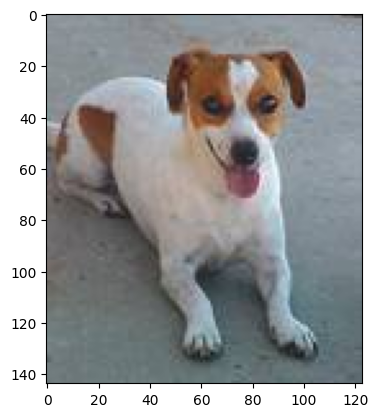

In [ ]:
# Display dog image
img = mpimg.imread('/content/train/dog.8115.jpg')
plt.imshow(img)

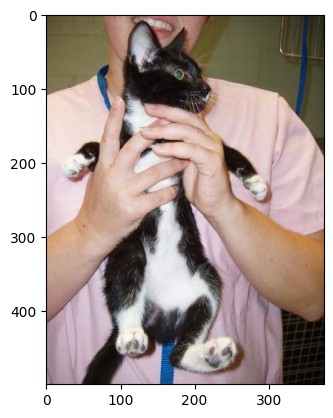

In [ ]:
# Display cat image
img = mpimg.imread('/content/train/cat.1115.jpg')
plt.imshow(img)

## Resizing all the images

In [ ]:
file_names = os.listdir('/content/train')
for i in range(5):
  name = file_names[i]
  print(name[0:3])

cat
cat
dog
dog
dog


In [ ]:
file_names = os.listdir('/content/train')
count_dog=0
count_cat=0
for i in file_names:
  name = i[0:3]
  if name == 'dog':
    count_dog+=1
  else:
    count_cat+=1
print(f"number of total dog files: {count_dog}")
print(f"number of total cat files: {count_cat}")


number of total dog files: 12500
number of total cat files: 12500


In [ ]:
# Creat a folder for resized images
os.mkdir('/content/resized_images')

In [ ]:
original_folder='/content/train/'
resized_folder='/content/resized_images/'

for i in range(2000):
  file_name = os.listdir(original_folder)[i]
  img_path = original_folder+file_name

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+file_name
  img.save(newImgPath)

In [ ]:
file_names = os.listdir('/content/resized_images')
print(file_names)

['cat.4036.jpg', 'cat.11924.jpg', 'dog.8114.jpg', 'dog.3332.jpg', 'dog.3140.jpg', 'cat.2784.jpg', 'cat.6762.jpg', 'dog.10136.jpg', 'cat.9716.jpg', 'dog.3355.jpg', 'dog.11698.jpg', 'cat.9954.jpg', 'cat.4483.jpg', 'dog.3508.jpg', 'cat.5787.jpg', 'dog.7666.jpg', 'dog.4337.jpg', 'dog.1797.jpg', 'cat.9122.jpg', 'dog.5321.jpg', 'cat.7391.jpg', 'cat.7344.jpg', 'cat.8136.jpg', 'cat.3663.jpg', 'cat.11265.jpg', 'cat.2107.jpg', 'cat.4619.jpg', 'dog.3641.jpg', 'dog.8816.jpg', 'cat.7402.jpg', 'cat.643.jpg', 'cat.3509.jpg', 'dog.2758.jpg', 'dog.3246.jpg', 'cat.7768.jpg', 'cat.2643.jpg', 'dog.10001.jpg', 'dog.4452.jpg', 'dog.2378.jpg', 'cat.9871.jpg', 'cat.9266.jpg', 'dog.2799.jpg', 'dog.4421.jpg', 'dog.9467.jpg', 'dog.6088.jpg', 'cat.7491.jpg', 'dog.10086.jpg', 'cat.1229.jpg', 'cat.5075.jpg', 'dog.11861.jpg', 'dog.5475.jpg', 'cat.558.jpg', 'dog.9934.jpg', 'cat.440.jpg', 'cat.10212.jpg', 'cat.9683.jpg', 'dog.7951.jpg', 'cat.4304.jpg', 'dog.4065.jpg', 'dog.2484.jpg', 'dog.9002.jpg', 'cat.5427.jpg', 'c

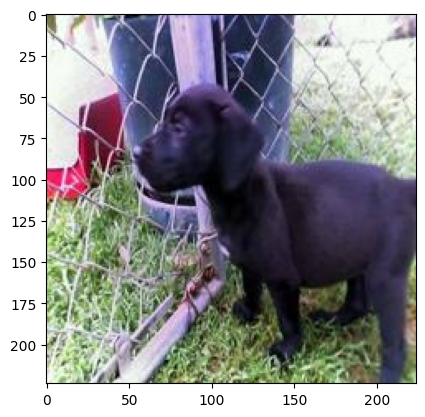

In [ ]:
# Display resized dog image
img = mpimg.imread('/content/resized_images/dog.3332.jpg')
plt.imshow(img)

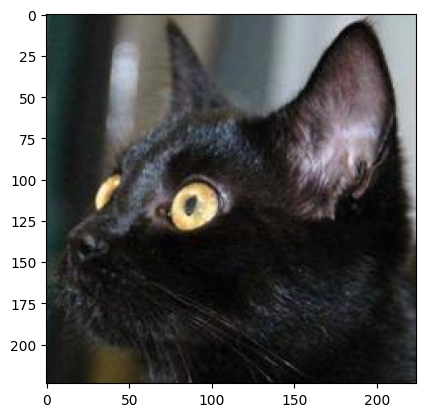

In [ ]:
# Display resized cat image
img = mpimg.imread('/content/resized_images/cat.2784.jpg')
plt.imshow(img)

## Creating labels for resized images of dogs and cats

cat --> 0

dog --> 1

In [ ]:
# creating a for loop to assign labels
resized_file_names = os.listdir('/content/resized_images')
labels = []
for i in range(2000):
  file_name = resized_file_names[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(labels)
print(len(labels))

[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 

In [ ]:
# count images of dogs and cats in labels
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1000 1000]


## Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob


In [ ]:
image_directory = '/content/resized_images/'
image_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images

# from List to Numpy Array

Y = np.asarray(labels)

## Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)
(2000,) (1600,) (400,)


## 1600 -> train
## 400 -> test

In [ ]:
# Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
#print(X_train_scaled)
#print(X_test_scaled)

## Building the Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import tf_keras as tfk
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
mobilenet_model = 'https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-feature-vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_classes = 2
num_of_classes = 2

model = tfk.Sequential([

    pretrained_model,
    tfk.layers.Dense(num_of_classes)

])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_10 (KerasLayer  (None, 1280)              2257984   
 )                                                               
                                                                 
 dense_3 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [96]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 64s 1s/step - loss: 0.1873 - acc: 0.9256
Epoch 2/5
50/50 [==============================] - 53s 1s/step - loss: 0.0687 - acc: 0.9750
Epoch 3/5
50/50 [==============================] - 51s 1s/step - loss: 0.0478 - acc: 0.9850
Epoch 4/5
50/50 [==============================] - 53s 1s/step - loss: 0.0381 - acc: 0.9894
Epoch 5/5
50/50 [==============================] - 50s 1s/step - loss: 0.0296 - acc: 0.9931


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 14s 944ms/step - loss: 0.0822 - acc: 0.9700
Test Loss = 0.08216992020606995
Test Accuracy = 0.9700000286102295


## Predictive System

Path of the image for prediction: /content/cat test.jpeg


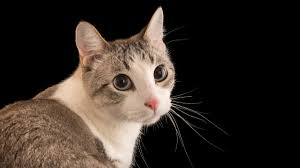

1/1 [==============================] - 0s 75ms/step
[[ 5.100183  -4.1956162]]
0
Cat


In [103]:
input_image_path = input('Path of the image for prediction: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

input_prediction = model.predict(image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('Cat')
else:
  print('Dog')